In [1]:
import numpy as np
import pandas as pd

import sys
import os
import random

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen

import cv2

import matplotlib.pyplot as plt

In [310]:
# save it to image and check then
# convert to png
# try with putalpha https://note.nkmk.me/en/python-pillow-putalpha/
# try with alpha from 255 to 0

In [253]:
#apple = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.png")
#apple = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.jpg")
#apple = Image.open("../test_images/apple_transp6.png")
#apple = Image.open("apple_transp_3_new_img.png")
#apple = Image.open("apple_transp_2tr_pil_tr.png") #- the best, quasi threshold
#apple = Image.open("apple_transp_3_np_tr.png")
#apple = Image.open("apple_transp_flour_pil_tr.png")
apple = Image.open("test.png")

In [254]:
apple.mode

'RGBA'

In [255]:
apple_w, apple_h = (200, 200)

In [256]:
apple = apple.resize((apple_w,apple_h))

In [257]:
background = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg")

In [258]:
background.paste(apple, (0,0) , apple)

In [259]:
background.show()

# Save it to image

In [38]:
#apple_s = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.jpg")
apple_s = Image.open("../test_images/apple_transp_3.jpeg")
apple_s.mode

'RGB'

In [39]:
#apple_s.show()

In [40]:
apple_s = apple_s.convert('RGBA')
apple_s.mode

'RGBA'

In [41]:
apple_s_w, apple_s_h = (200, 200)

In [42]:
apple_s = apple_s.resize((apple_s_w, apple_s_h))

In [43]:
background_s = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg")
background_s.mode

'RGB'

In [44]:
background_s = background_s.convert('RGBA')
background_s.mode

'RGBA'

In [45]:
background_s.paste(apple_s, (0,0), mask = apple_s)

In [46]:
background_s.save("background_s.png")

In [47]:
background_s.show()

# Convert to png

In [263]:
#apple_conv = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.jpg")
apple_conv = Image.open("../test_images/apple_transp_3.jpeg")
apple_conv = apple_conv.convert('RGBA')
apple_conv.save("apple_conv.png")

In [264]:
apple_conv = Image.open("apple_conv.png")

In [265]:
apple_conv_w, apple_conv_h = (200, 200)

In [266]:
apple_conv = apple_conv.resize((apple_conv_w, apple_conv_h))

In [267]:
background_conv = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg")

In [268]:
background_conv.paste(apple_conv,  (0,0), apple_conv)

In [269]:
background_conv.show()

# Add Alpha Channel

## PIL 

In [200]:
# https://stackoverflow.com/questions/765736/using-pil-to-make-all-white-pixels-transparent
from PIL import Image

img = Image.open('../test_images/flour.jpg')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] > 200 and item[1] > 200 and item[2] > 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("apple_transp_flour_pil_tr.png", "PNG")

## numpy

In [144]:
# https://stackoverflow.com/questions/765736/using-pil-to-make-all-white-pixels-transparent
import numpy as np

img = Image.open('../test_images/apple_transp_3.jpeg')

#def white_to_transparency(img):
x = np.asarray(img.convert('RGBA')).copy()

x[:, :, 3] = (255 * (x[:, :, :3] != 255).any(axis=2)).astype(np.uint8)

new = Image.fromarray(x)
new.show()
new.save("apple_transp_3_np_tr.png", "PNG")

# Change alpha value

### putalpha

In [270]:
apple_mask = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.jpg")
#apple_mask = apple_mask.convert('RGBA')

In [271]:
apple_mask_w, apple_mask_h = (200, 200)

In [272]:
apple_mask = apple_mask.resize((apple_mask_w, apple_mask_h))

In [273]:
background_mask = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg")

In [274]:
#mask = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.jpg")
#mask = mask.resize((apple_mask_w, apple_mask_h))
#mask = mask.convert("L")
#mask.show()

In [275]:
#bar = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.jpg")
#bar = bar.resize((apple_mask_w, apple_mask_h))
#bar.putalpha(mask)
apple_mask.putalpha(0)
#bar.show()

In [276]:
background_mask.paste(apple_mask,  (0,0), apple_mask)

In [277]:
background_mask.show()

### numpy manipulation

In [351]:
#apple_np = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/apple.jpg")
#apple_np = Image.open("../test_images/apple_transp.jpeg")
apple_np = Image.open("../test_images/apple_transp_3.jpeg")
apple_np.mode

'RGB'

In [352]:
apple_np = apple_np.convert('RGBA')
apple_np.mode

'RGBA'

In [353]:
apple_np_w, apple_np_h = (200, 200)

In [354]:
apple_np = apple_np.resize((apple_np_w, apple_np_h))

In [355]:
background_np = Image.open("../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg")
background_np.mode

'RGB'

In [356]:
background_np = background_np.convert('RGBA')
background_np.mode

'RGBA'

In [357]:
from numpy import asarray

In [358]:
mask_layer = apple_np.split()[3]
mask_layer = asarray(mask_layer) * 0
mask_layer = Image.fromarray(mask_layer)

In [359]:
background_np.paste(apple_np, (0,0), mask = apple_np)

In [360]:
background_np.show()

In [228]:
np.array(apple_np)[:,:,3]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

True

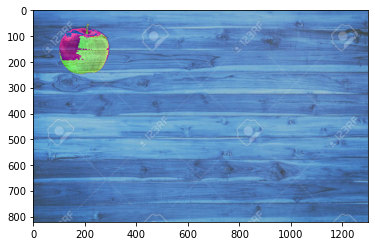

In [347]:
import cv2
apple_np = cv2.imread("../test_images/apple_transp_3.jpeg")
apple_np = cv2.resize(apple_np, (200,200))

gray_image = apple_np.mean(2)
mask_transparent = gray_image > 250

background_np = cv2.imread("../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg")

x0 = 50
y0 = 100
for i in range(3):
    background_np[x0:x0+apple_np.shape[0], y0:y0+apple_np.shape[1], i][~mask_transparent] +=\
        apple_np[~mask_transparent, i]


#apple_np = cv2.cvtColor(apple_np, cv2.COLOR_BGR2BGRA) 
#apple_np[:,:,3] = mask_transparent.astype(int)*255

#apple_pil = Image.fromarray(np.uint8(apple_np))
#background_np.paste(apple_pil, (0,0), mask = apple_pil)
#background_np.show()

plt.imshow(background_np)
cv2.imwrite('test_np.jpg', background_np)

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

# Try with CV2

In [14]:
# adaptive thresholding: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
# Google with the function and a lot of examples

ingredient_cv = cv2.imread("../test_images/apple_transp_3.jpeg")

#load background
background_cv = cv2.imread('../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg')
                
# resize ingredient image to make sure it is always smaller than the background
rows_i = int(background_cv.shape[0]/2)
cols_i = int(background_cv.shape[1]/2)
dim_res = (cols_i, rows_i)
ingredient_res = cv2.resize(ingredient_cv, dim_res)
                
# Create a Region of Images (=ROI) in a randomised matter 
rows, cols, channels = ingredient_res.shape
            
start_rows = np.random.randint(0, background_cv.shape[0]-rows)
end_rows = start_rows + rows
start_cols = np.random.randint(0, background_cv.shape[1]-cols)
end_cols = start_cols + cols

roi = background_cv[start_rows:end_rows, start_cols:end_cols]
                
#parameters for rotation
#M are the coordinates of the center, (cols/2, rows/2) is the center of rotation for the image
deg = np.random.randint(0, 360)
M = cv2.getRotationMatrix2D((cols/2, rows/2), deg, 1)
                
ingredient_rot = cv2.warpAffine(ingredient_res, M, (cols, rows))

# Now create a mask of the ingredient and create its inverse mask also
img2gray = cv2.cvtColor(ingredient_res, cv2.COLOR_BGR2GRAY)

# everything higher than the threshold (i.e. lighter), will become black
# the rest (i.e. the darker pixels filled by the object), will become white
# with THRESH_OTSU the threshold is adjustable according to the image
# similar to the idea to take the mean value between black and white as a threshold
# the GaussianBluring smooths the image to make the black & white more precise
blur = cv2.GaussianBlur(img2gray, (5,5), 0)
#ret, 
mask = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
            #cv2.threshold(blur, 0, 255,  cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
mask_rot = cv2.warpAffine(mask, M, (cols, rows))
                
mask_inv = cv2.bitwise_not(mask_rot)

# Black-out the area of the ingredient in ROI in the background image
background_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of the ingredient from the ingredient image.
ingredient_fg = cv2.bitwise_and(ingredient_rot, ingredient_rot, mask = mask_rot)

# Put the ingredient in ROI and modify the main image
dst = cv2.add(background_bg, ingredient_fg)

#positions are randomised (see above)
background_cv[start_rows:end_rows, start_cols:end_cols] = dst
                
img_comb = background_cv
                                         
#filename = os.path.splitext(f)[0]
#file_path_comb = os.path.join(root, f'{filename}_comb.jpg')
cv2.imwrite('test_cv.jpg', img_comb)

True

# OpenCV Try with edge detection

In [255]:
#https://stackoverflow.com/questions/52810099/making-background-transparent-in-jpeg-image-by-converting-to-png
#Parameters
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format


ingredient_cv = cv2.imread("../test_images/apple_transp_3.jpeg")

#load background
background_cv = cv2.imread('../artificial_dataset/small-combiner-of-ingred-with-background/background.jpg')
                
# resize ingredient image to make sure it is always smaller than the background
rows_i = int(background_cv.shape[0]/2)
cols_i = int(background_cv.shape[1]/2)
dim_res = (cols_i, rows_i)
ingredient_res = cv2.resize(ingredient_cv, dim_res)
                
# Create a Region of Images (=ROI) in a randomised matter 
rows, cols, channels = ingredient_res.shape
            
start_rows = np.random.randint(0, background_cv.shape[0]-rows)
end_rows = start_rows + rows
start_cols = np.random.randint(0, background_cv.shape[1]-cols)
end_cols = start_cols + cols

roi = background_cv[start_rows:end_rows, start_cols:end_cols]
                
#parameters for rotation
#M are the coordinates of the center, (cols/2, rows/2) is the center of rotation for the image
#deg = np.random.randint(0, 360)
#M = cv2.getRotationMatrix2D((cols/2, rows/2), deg, 1)
                
#ingredient_rot = cv2.warpAffine(ingredient_res, M, (cols, rows))

# Now create a mask of the ingredient and create its inverse mask also
#img2gray = cv2.cvtColor(ingredient_res, cv2.COLOR_BGR2GRAY)

hsv = cv2.cvtColor(ingredient_res, cv2.COLOR_BGR2HSV)
v = hsv[:,:,2]
th, threshed = cv2.threshold(v, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
threshed[-1] = 255

cnts = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]

mask = np.zeros_like(threshed)
cv2.drawContours(mask, cnts, -1, (255, 0, 0), -1, cv2.LINE_AA)
mask = cv2.erode(mask, np.ones((3,3), np.int32), iterations=1)

png = np.dstack((ingredient_res, mask))
cv2.imwrite("test_hsv.png", png)


# everything higher than the threshold (i.e. lighter), will become black
# the rest (i.e. the darker pixels filled by the object), will become white
# with THRESH_OTSU the threshold is adjustable according to the image
# similar to the idea to take the mean value between black and white as a threshold
# the GaussianBluring smooths the image to make the black & white more precise

#blur = cv2.GaussianBlur(img2gray, (5,5), 0)
#ret, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#mask_rot = cv2.warpAffine(mask, M, (cols, rows))
                
#mask_inv = cv2.bitwise_not(mask_rot)

# Black-out the area of the ingredient in ROI in the background image
#background_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of the ingredient from the ingredient image.
#ingredient_fg = cv2.bitwise_and(ingredient_rot, ingredient_rot, mask = mask_rot)

# Put the ingredient in ROI and modify the main image
#dst = cv2.add(background_bg, ingredient_fg)

#positions are randomised (see above)
#background_cv[start_rows:end_rows, start_cols:end_cols] = dst
                
#img_comb = background_cv
                                         
#filename = os.path.splitext(f)[0]
#file_path_comb = os.path.join(root, f'{filename}_comb.jpg')
#cv2.imwrite('test_cv.jpg', img_comb)

True

In [230]:
# https://www.nuomiphp.com/eplan/en/155124.html
# edges and contours: https://www.pyimagesearch.com/2014/04/21/building-pokedex-python-finding-game-boy-screen-step-4-6/
# documentation findContours: https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html

# white jpeg images into transparent & then simple copy paste
# download png images and copy paste them ... 
# numpy png images

import cv2
import numpy as np

# read image
img = cv2.imread('../test_images/apple_transp_3.jpeg')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("GREY", gray)

# invert gray image
gray = 255 - gray
cv2.imshow("INV_GREY", gray)

# threshold
thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)[1]

# apply close and open morphology to fill tiny black and white holes and save as mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# get contours (presumably just one around the nonzero pixels) 
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(contours)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]
x,y,w,h = cv2.boundingRect(cntr)

# make background transparent by placing the mask into the alpha channel
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
new_img[:, :, 3] = mask

# then crop it to bounding rectangle
crop = new_img[y:y+h, x:x+w]

# save cropped image
cv2.imwrite('apple_transp_3_thresh.png',thresh)
cv2.imwrite('apple_transp_3_mask.png',mask)
cv2.imwrite('apple_transp_3_new_img.png',new_img)
cv2.imwrite('apple_transp_3_cropped.png',crop)

# show the images
cv2.imshow("THRESH", thresh)
cv2.imshow("MASK", mask)
cv2.imshow("new_img", new_img)
cv2.imshow("CROP", crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# https://docs.opencv.org/3.4.3/d8/d83/tutorial_py_grabcut.html
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('../test_images/apple_transp_3.jpeg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

# newmask is the mask image I manually labelled
newmask = cv.imread('newmask.png',0)
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]

In [261]:
# https://www.thetopsites.net/article/50159769.shtml
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = cv2.imread('../test_images/carrot.jpg')
rows, cols, channels = img.shape

mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, cols), np.float64)
fgdModel = np.zeros((1, cols), np.float64)
rect = (1, 1, rows, cols)

# Grabcut 
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

r_channel, g_channel, b_channel = cv2.split(img) 
a_channel = np.where((mask==2)|(mask==0), 0, 255).astype('uint8')  

img_RGBA = cv2.merge((r_channel, g_channel, b_channel, a_channel))
cv2.imwrite("test.png", img_RGBA)

# Now for plot correct colors : 
img_BGRA = cv2.merge((b_channel, g_channel, r_channel, a_channel))

plt.imshow(img_BGRA), plt.colorbar(),plt.show()

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/grabcut.cpp:96: error: (-5:Bad argument) _model must have CV_64FC1 type, rows == 1 and cols == 13*componentsCount in function 'GMM'
